In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 

In [3]:
#Cargamos el dataframe limpio
df = pd.read_csv("datos/SpotifyYtlimpio.csv")

<h2> Filtrado y Visualziación </h2>
<li>¿Cuáles son los valores únicos de la columna "album_type"? Cread tres dataframes diferentes, uno para cada tipo de "album_type". ¿Cuántas canciones tenemos en cada tipo?</li>

In [4]:
#Vemos los valores únicos de album type
df["album_type"].unique()

array(['album', 'single', 'compilation'], dtype=object)

In [5]:
df_album = df[df["album_type"] == "album"]
df_single = df[df["album_type"]== "single"]
df_compilation = df[df["album_type"] == "compilation"]

In [6]:
df_album.shape

(13845, 28)

In [7]:
df_single.shape

(4636, 28)

In [8]:
df_compilation.shape

(689, 28)

<li>Usando el dataframe de los albumes que hemos creado en el ejercicio anterior. ¿Cuál es la media y la desviación estándar de "danceability", "acousticness" y "speechiness" de cada artista?. Mostrad los resultados en tres dataframes diferentes, uno para cada métrica ("danceability", "acousticness" y "speechiness"). Ordenar los resultados de mayor a menor en base a la media.</li>

In [17]:
media_dc = df_album["danceability"].mean()
std_dc = df_album["danceability"].std()
media_ac = df_album["acousticness"].mean()
std_ac = df_album["acousticness"].std()
media_sp = df_album["speechiness"].mean()
std_sp = df_album["speechiness"].std()

In [15]:
data = {'media':[media_dc,media_ac,media_sp], 'std': [std_dc,std_ac,std_sp]}
df_data = pd.DataFrame.from_dict(data, orient='index', columns=['danceability', 'acousticness', 'speechiness']).round(2)

In [16]:
df_data

,danceability,acousticness,speechiness
media,0.61,0.29,0.09
std,0.17,0.29,0.11


<li>Se quiere estudiar si existe una relación entre la cantidad de visitas que reciben los videos de música de un artista en una plataforma de streaming y la cantidad de likes que estos videos obtienen. Por lo tanto, querremos contestar a la siguiente pregunta: ¿Son aquellos artistas que tienen más visitas los que más likes tienen? Para solucionar este ejercicio deberéis:<li>
<ul>
<li>Agrupar por artista y calcular la media de visitas y de likes</li>
</ul>

In [44]:
df_artist = df_album.groupby("artist")["views"].mean().round(2).reset_index()
df_artist1 = df_album.groupby("artist")["likes"].mean().round(2).reset_index()

In [45]:
dfmerge = df_artist.merge(df_artist1)

<li>Quedaros con los 10 artistas que más visitas han tenido.</li>

In [49]:
df_popviews = dfmerge.sort_values(by=['views'], ascending= False)
df_popviews_top =df_popviews.head(10)

In [50]:
df_poplikes = dfmerge.sort_values(by=["likes"], ascending= False)
df_poplikes_top = df_poplikes.head(10)

<li>Haced un subplot, donde en uno tengamos los 10 artistas con más likes y en el otro los 10 artistas con mas views.</li>

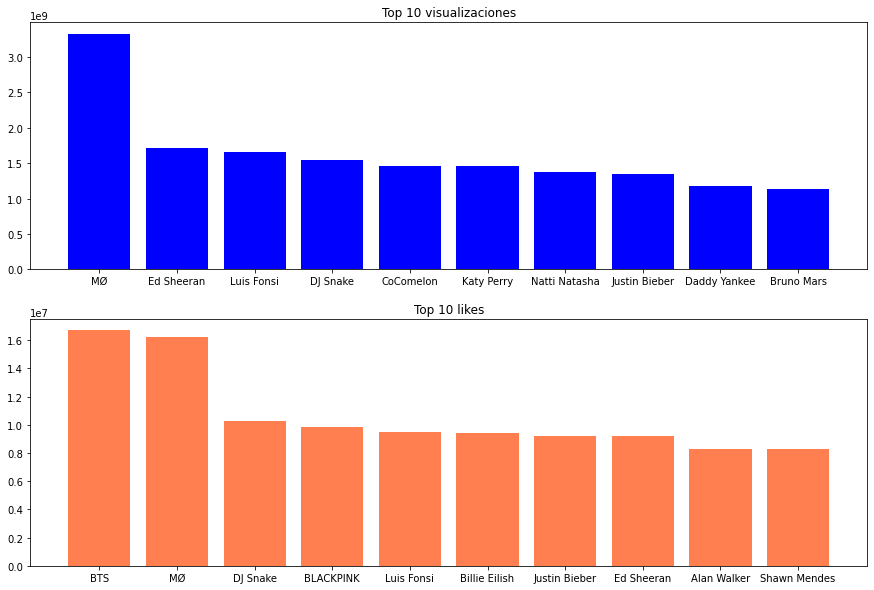

In [59]:
fig,ax = plt.subplots(2,1, figsize = (15,10))
ax[0].bar(df_popviews_top["artist"],df_popviews_top["views"], color = "blue")
ax[1].bar(df_poplikes_top["artist"], df_poplikes_top["likes"], color ="coral")
ax[0].set_title("Top 10 visualizaciones")
ax[1].set_title("Top 10 likes")
plt.show()

<li>BONUS Haced lo mismo para los datos de tipo "single".</li>

<p>Ahora queremos analizar la colaboración entre artistas en la industria musical, se tienen datos de las colaboraciones realizadas en los últimos años. Se desea conocer cuáles son los artistas que han colaborado en mayor cantidad de canciones y generar un ranking con los diez primeros. ¿Qué artistas con los que más colaboraciones tienen? Para esto tendréis que:</p>
<li>Filtrad los datos para quedaros solo con aquellos datos donde en la columna "track" tengamos "feat".</li>

In [60]:
patron = "feat"
colaboraciones = df[df["track"].str.contains(patron, regex= True)]
colaboraciones.head()

,Unnamed: 0,artist,url_spotify,track,album,album_type,uri,danceability,energy,key,...,url_youtube,title,channel,views,likes,comments,description,licensed,official_video,stream
2,2,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,new gold (feat. tame impala and bootie brown),new gold (feat. tame impala and bootie brown),single,spotify:track:64dLd6rVqDLtkXFYrEUHIU,0.69,0.92,1.0,...,https://www.youtube.com/watch?v=qJa-VFwPpYA,gorillaz - new gold ft. tame impala & bootie b...,Gorillaz,8435055.0,282142.0,7399.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,True,True,63063467.0
6,6,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,new gold (feat. tame impala and bootie brown) ...,new gold (feat. tame impala and bootie brown) ...,single,spotify:track:2c3KCGq6UojB2c8UAFrRON,0.72,0.90,4.0,...,https://www.youtube.com/watch?v=BONNm0F7Tto,"gorillaz - new gold ft. tame impala, bootie br...",Dom Dolla,451996.0,11686.0,241.0,"Gorillaz 'New Gold' ft. Tame Impala, Bootie Br...",False,True,10666154.0
7,7,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,she's my collar (feat. kali uchis),humanz (deluxe),album,spotify:track:3lIxtCaROdRDuTnNBDm3n2,0.73,0.81,11.0,...,https://www.youtube.com/watch?v=f8NwLXYIHS4,gorillaz - she's my collar [hq],SalvaMuñox,1010982.0,17675.0,260.0,𝐁̲𝐎̲𝐍̲𝐔̲𝐒̲:̲ Hu̳ma̳n̳z [̲̠̲𝐃̲̠̲𝐄̲̠̲𝐅̲̠̲𝐈̲̠̲𝐍̲̠...,False,False,159605929.0
8,8,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,cracker island (feat. thundercat),cracker island (feat. thundercat),single,spotify:track:2W3ZpQg9i6lE6kmHbcdu9N,0.74,0.91,2.0,...,https://www.youtube.com/watch?v=S03T47hapAc,gorillaz - cracker island ft. thundercat (offi...,Gorillaz,24459820.0,739527.0,20296.0,Listen to Cracker Island: https://gorillaz.lnk...,True,True,42671901.0
27,27,50 Cent,https://open.spotify.com/artist/3q7HBObVc0L8jN...,is this love ('09) (feat. 50 cent),curtain call 2,album,spotify:track:7rK0iM6jwuo1oizdx8suQA,0.85,0.78,8.0,...,https://www.youtube.com/watch?v=Zl64MRAqQxk,"eminem, 50 cent - is this love ('09) [visualizer]",EminemVEVO,5289821.0,245935.0,9008.0,"Listen to ""Curtain Call 2"": \nhttps://Eminem.l...",True,True,28529840.0


<li>Contad cuantas canciones tiene cada artista utilizando el dataframe generado en el paso anterior.</li>

In [81]:
df_colab = colaboraciones.groupby("artist")["track"].count().reset_index()

In [83]:
df_colab = df_colab.sort_values(by=["track"], ascending = False)

In [84]:
df_colab_top = df_colab.head(10)
df_colab_top

,artist,track
387,Macklemore,10
293,Juicy J,10
625,Ty Dolla ign,9
134,DJ Khaled,9
646,Wu-Tang Clan,9
46,B.o.B,8
645,Wizkid,8
121,Clean Bandit,8
637,Wale,8
498,Popcaan,8


In [110]:
df_prueba = df[df["artist"] == "Katy Perry"]

In [111]:
df_prueba.shape

(10, 28)

In [112]:
df_prueba.head(10)

,Unnamed: 0,artist,url_spotify,track,album,album_type,uri,danceability,energy,key,...,url_youtube,title,channel,views,likes,comments,description,licensed,official_video,stream
11907,13029,Katy Perry,https://open.spotify.com/artist/6jJ0s89eD6GaHl...,dark horse,prism,album,spotify:track:4jbmgIyjGoXjY01XxatOx6,0.65,0.58,6.0,...,https://www.youtube.com/watch?v=0KSOMA3QBU0,katy perry - dark horse (official) ft. juicy j,KatyPerryVEVO,3.442527e+09,16342399.0,794592.0,Listen to Katy’s new song “Smile”: https://kat...,True,True,1.067827e+09
11908,13030,Katy Perry,https://open.spotify.com/artist/6jJ0s89eD6GaHl...,unconditionally,prism,album,spotify:track:009ImBOrIUlWgla8U05RAC,0.43,0.72,7.0,...,https://www.youtube.com/watch?v=XjwZAa2EjKA,katy perry - unconditionally (official),KatyPerryVEVO,6.522712e+08,3433059.0,107580.0,"Download ""Unconditionally"" from Katy Perry's '...",True,True,4.566808e+08
11909,13031,Katy Perry,https://open.spotify.com/artist/6jJ0s89eD6GaHl...,when i’m gone (with katy perry),when i’m gone (with katy perry),single,spotify:track:5902W4uHWzhtOff1UK7the,0.69,0.89,0.0,...,https://www.youtube.com/watch?v=N-4YMlihRf4,"alesso, katy perry - when i'm gone (official m...",KatyPerryVEVO,2.966849e+07,582383.0,69930.0,Alesso & Katy Perry - When I'm Gone (Official ...,True,True,1.799929e+08
11910,13032,Katy Perry,https://open.spotify.com/artist/6jJ0s89eD6GaHl...,roar,prism,album,spotify:track:27tNWlhdAryQY04Gb2ZhUI,0.67,0.77,7.0,...,https://www.youtube.com/watch?v=CevxZvSJLk8,katy perry - roar (official),KatyPerryVEVO,3.725749e+09,15864499.0,763366.0,"Katy Perry's new album ""Smile"" out August 28 -...",True,True,8.847210e+08
11911,13033,Katy Perry,https://open.spotify.com/artist/6jJ0s89eD6GaHl...,"feels (feat. pharrell williams, katy perry & b...",funk wav bounces vol.1,album,spotify:track:5bcTCxgc7xVfSaMV3RuVke,0.89,0.74,11.0,...,https://www.youtube.com/watch?v=ozv4q2ov3Mk,calvin harris - feels (official video) ft. pha...,CalvinHarrisVEVO,6.734978e+08,4097989.0,105475.0,"Calvin Harris - Feels feat. Pharrell Williams,...",True,True,9.812871e+08
11912,13034,Katy Perry,https://open.spotify.com/artist/6jJ0s89eD6GaHl...,the one that got away,teenage dream,album,spotify:track:6hkOqJ5mE093AQf2lbZnsG,0.69,0.80,1.0,...,https://www.youtube.com/watch?v=Ahha3Cqe_fk,katy perry - the one that got away (official m...,KatyPerryVEVO,9.530567e+08,4500259.0,225804.0,CELEBRATING TEN YEARS OF TEENAGE DREAM!!\nREMA...,True,True,6.001068e+08
11913,13035,Katy Perry,https://open.spotify.com/artist/6jJ0s89eD6GaHl...,harleys in hawaii,smile,album,spotify:track:3B4etxytImrRKQgV3XHjnR,0.72,0.75,10.0,...,https://www.youtube.com/watch?v=sQEgklEwhSo,katy perry - harleys in hawaii (official),KatyPerryVEVO,1.081547e+08,1966195.0,69129.0,"Katy Perry's new album ""Smile"" out August 28 -...",True,True,3.338720e+08
11914,13036,Katy Perry,https://open.spotify.com/artist/6jJ0s89eD6GaHl...,last friday night (t.g.i.f.),teenage dream,album,spotify:track:3avYqdwHKEq8beXbeWCKqJ,0.65,0.81,3.0,...,https://www.youtube.com/watch?v=KlyXNRrsk4A,katy perry - last friday night (t.g.i.f.) (off...,KatyPerryVEVO,1.454602e+09,6701586.0,425561.0,CELEBRATING TEN YEARS OF TEENAGE DREAM!!\nREMA...,True,True,7.554063e+08
11915,13037,Katy Perry,https://open.spotify.com/artist/6jJ0s89eD6GaHl...,firework,teenage dream,album,spotify:track:4r6eNCsrZnQWJzzvFh4nlg,0.64,0.83,8.0,...,https://www.youtube.com/watch?v=QGJuMBdaqIw,katy perry - firework (official music video),KatyPerryVEVO,1.406704e+09,6231519.0,445941.0,CELEBRATING TEN YEARS OF TEENAGE DREAM!!\nREMA...,True,True,7.776267e+08
11916,13038,Katy Perry,https://open.spotify.com/artist/6jJ0s89eD6GaHl...,california gurls,teenage dream,album,spotify:track:6KOEK6SeCEZOQkLj5M1PxH,0.79,0.75,0.0,...,https://www.youtube.com/watch?v=F57P9C4SAW4,katy perry - california gurls (official music ...,KatyPerryVEVO,6.744010e+08,3347202.0,145889.0,CELEBRATING TEN YEARS OF TEENAGE DREAM!!\nREMA...,True,True,5.698082e+08


<li>Mostrad los resultados en una gráfica, seleccionado los 10 artistas con más colaboraciones.</li>

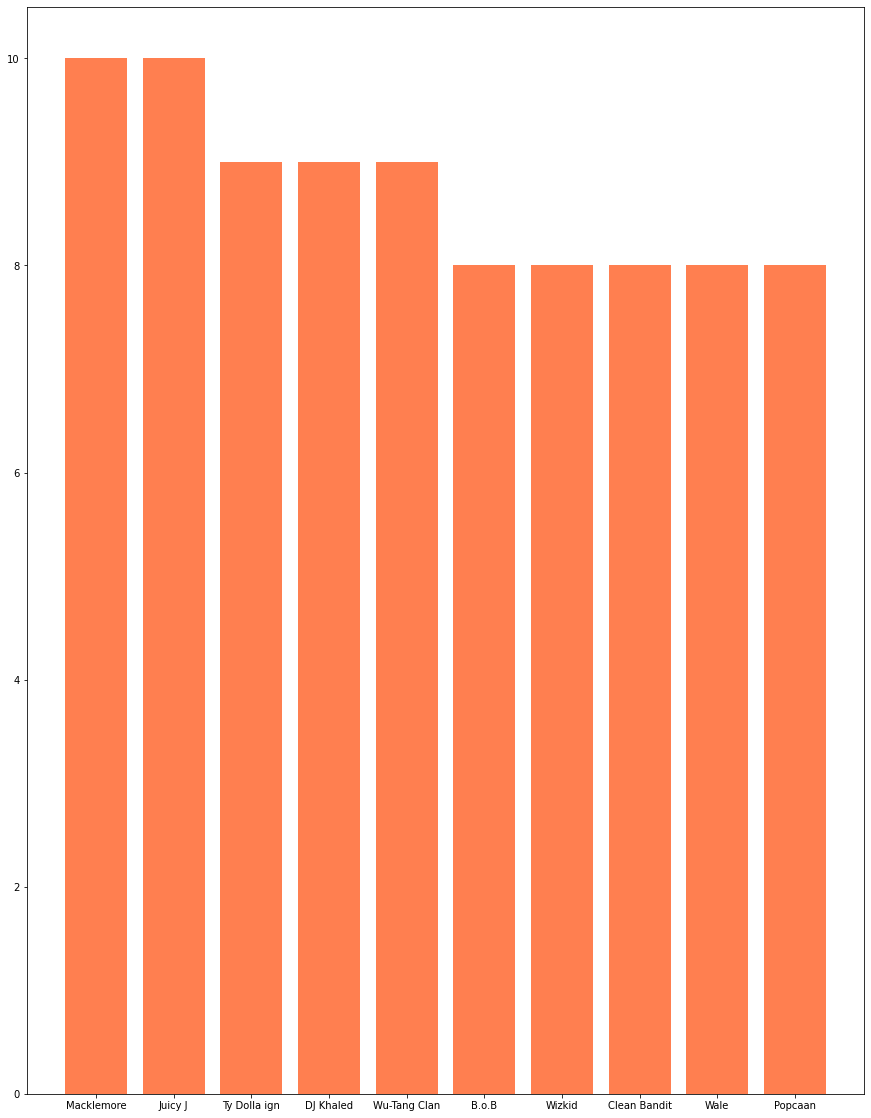

In [88]:
plt.figure(figsize=(15,20))
plt.bar(df_colab_top["artist"], df_colab_top["track"], color = 'coral')
plt.show()

<li>Deberéis contestar a las siguientes preguntas:<li>
<ul>
<li>¿Cuáles son los diez artistas que más han colaborado según los datos que tenemos?</li>
<p> Macklemore, Juicy J, Ty Dolla, Dj Khaled, Wu-Tang Clan, B.o.B, Wizkid, Clean Bandit, Wale, Popcaan</p>
<li>¿Cuál es el número de canciones en los que ha colaborado el artista que ocupa el primer lugar en el ranking?</li><p> Mcklemore con diez canciones </p>
<li>¿Cuál es el artista que ocupa el décimo lugar en el ranking y en cuántas canciones ha colaborado?</li><p>Popcaan ocupa el décimo lugar con ocho canciones.</p>

<li>Utilizando el dataframe original, queremos explorar si el tipo de álbum influye en la cantidad de vistas que recibe en una plataforma de transmisión de música. Para ello, debemos generar un boxplot con las variables necesarias y responder las siguientes preguntas:</li>

<li>¿Qué tipo de álbumes tienden a tener más vistas en promedio?</li>

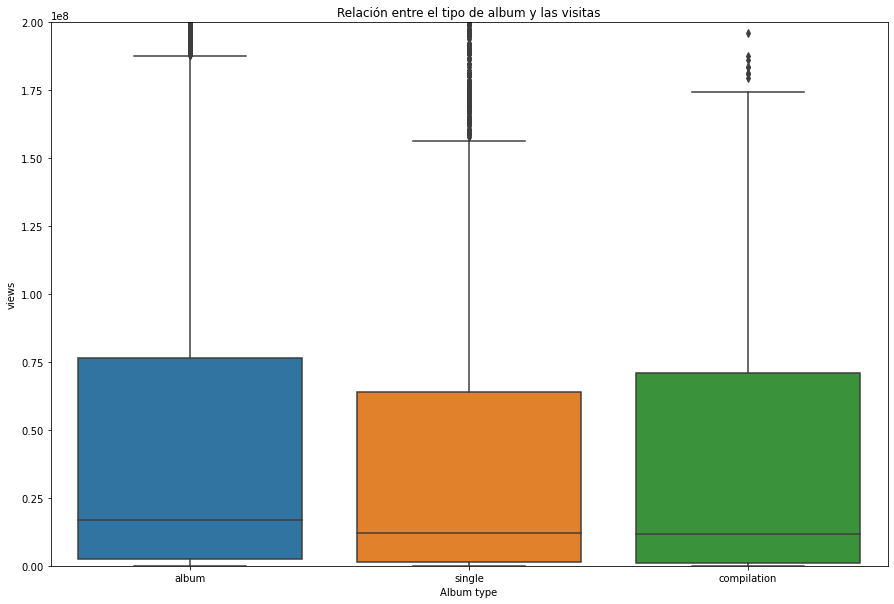

In [116]:
plt.figure(figsize=(15,10))
fig = sns.boxplot(x="album_type", y = "views", data=df)
fig.set(xlabel = "Album type", ylabel = "views")
fig.set_title("Relación entre el tipo de album y las visitas")
fig.set_ylim(0,2e8)
plt.show()

<ul>
<li>¿Qué tipo de álbumes tienden a tener más vistas en promedio?</li>
<p>De forma muy ajustada los álbumes.</p>
<li>¿Hay algún tipo de álbumes que tenga una mayor dispersión en las vistas recibidas?</li>
<p>Los álbumes, pero también hay que destacar los singles pues su caja es menor que las de otros discos pero tiene gran cantidad de outliers.</p>
<li>¿Existen valores atípicos (outliers) en alguna categoría de álbumes?</li>
<p>Sí, en todas</p>
<li>¿Qué conclusión se puede obtener sobre la relación entre el tipo de álbum y la cantidad de vistas recibidas?</li>
<p>Que aunque los singles puedan tener picos de popularidad mas efímeros la base de visualizaciones y popularidad a largo plazo predomina en los albumes y las compilaciones</p>
</ul>

In [ ]:
#Hacer un dataframe con los grupos de outliers y buscar que porcentaje son respecto al total